# Extensions to Linear Models - Lab

## Introduction

In this lab, you'll practice many concepts learned in this section, from adding interactions and polynomials to your model to AIC and BIC!

## Summary

You will be able to:
- Build a linear regression model with polynomial features/interactions
- Perform regularization
- Use AIC and BIC to select the best value for the regularization parameter


## Let's get started!

Import all the necessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

from sklearn.datasets import load_boston

## Look at a Baseline Boston Housing Data Model

Import the Boston housing data set, use all the predictors in their scaled version (using `preprocessing.scale`. Look at a baseline model using *scaled variables* as predictors. Use 5-fold cross-validation this time and use the $R^2$ score to evaluate the model.

In [2]:
# Load data
boston = load_boston()

In [3]:
# Scale features
X = pd.DataFrame(preprocessing.scale(X=boston.data), columns=boston.feature_names)
y = boston.target

In [4]:
# 5 folds cross-validation
linreg = LinearRegression()

def evaluate_model(model, X, y):
    kf = KFold(n_splits=5, random_state=12, shuffle=True)
    return np.mean(cross_val_score(linreg, X, y, cv=kf, scoring='r2'))

baseline = evaluate_model(linreg, X, y)
baseline

0.7156331552406606

## Include interactions

Look at all the possible combinations of variables for interactions by adding interactions one by one to the baseline model. Next, evaluate that model using 5-fold classification and store the $R^2$ to compare it with the baseline model.

You've created code for this before in the interactions lab, yet this time, you have scaled the variables so the outcomes may look different. 

Print the 7 most important interactions.

In [5]:
# Your code here
from itertools import combinations
combs = list(combinations(X.columns, 2))
combs[:10]

[('CRIM', 'ZN'),
 ('CRIM', 'INDUS'),
 ('CRIM', 'CHAS'),
 ('CRIM', 'NOX'),
 ('CRIM', 'RM'),
 ('CRIM', 'AGE'),
 ('CRIM', 'DIS'),
 ('CRIM', 'RAD'),
 ('CRIM', 'TAX'),
 ('CRIM', 'PTRATIO')]

In [6]:
baselines = []
regression = LinearRegression()
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=12)

# Build comb-baseline array
data = X.copy()
for comb in combs:
    data["interaction"] = data[comb[0]] * data[comb[1]]

    baseline_comb = np.mean(cross_val_score(regression, data, y, scoring="r2", cv=crossvalidation))
    if baseline_comb > baseline: baselines.append({'comb': comb, 'baseline': baseline_comb})

In [7]:
sorted_baselines = sorted(baselines, key=lambda x: x['baseline'], reverse=True)
top_7_interactions = sorted_baselines[:7]
top_7_interactions

[{'comb': ('RM', 'LSTAT'), 'baseline': 0.7864675777138392},
 {'comb': ('RM', 'TAX'), 'baseline': 0.7768085533807325},
 {'comb': ('RM', 'RAD'), 'baseline': 0.7722063867218649},
 {'comb': ('RM', 'PTRATIO'), 'baseline': 0.765865431633521},
 {'comb': ('INDUS', 'RM'), 'baseline': 0.7532015775184485},
 {'comb': ('NOX', 'RM'), 'baseline': 0.7421936164330537},
 {'comb': ('RM', 'B'), 'baseline': 0.7395104139596987}]

Write code to include the 7 most important interactions in your data set by adding 7 columns. Name the columns "var1_var2" with var1 and var2 the two variables in the interaction.

In [9]:
# Your code here
X_interactions = np.zeros((len(data), len(top_7_interactions)))
col_names = []
for ind, top_interaction in enumerate(top_7_interactions):
    col_names.append('{}_{}'.format(top_interaction['comb'][0],top_interaction['comb'][1]))
    X_interactions[:,ind] = data[top_interaction['comb'][0]] * data[top_interaction['comb'][1]]

X_interactions = pd.DataFrame(X_interactions, columns=col_names)
X_interactions.head()


,RM_LSTAT,RM_TAX,RM_RAD,RM_PTRATIO,INDUS_RM,NOX_RM,RM_B
0,-0.444930,-0.275757,-0.406574,-0.603547,-0.532772,-0.059659,0.182451
1,-0.095668,-0.191813,-0.168607,-0.058883,-0.115279,-0.143814,0.085685
2,-1.550451,-1.266461,-1.113245,-0.388783,-0.761138,-0.949544,0.508502
3,-1.383713,-1.124148,-0.765197,0.114875,-1.328183,-0.848901,0.422947
4,-1.261136,-1.358947,-0.925023,0.138869,-1.605599,-1.026210,0.541866


In [10]:
X = pd.concat([X, X_interactions], axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RM_LSTAT,RM_TAX,RM_RAD,RM_PTRATIO,INDUS_RM,NOX_RM,RM_B
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,-0.444930,-0.275757,-0.406574,-0.603547,-0.532772,-0.059659,0.182451
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.095668,-0.191813,-0.168607,-0.058883,-0.115279,-0.143814,0.085685
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,-1.550451,-1.266461,-1.113245,-0.388783,-0.761138,-0.949544,0.508502
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,-1.383713,-1.124148,-0.765197,0.114875,-1.328183,-0.848901,0.422947
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,-1.261136,-1.358947,-0.925023,0.138869,-1.605599,-1.026210,0.541866


## Include Polynomials

Try polynomials of 2, 3 and 4 for each variable, in a similar way you did for interactions (by looking at your baseline model and seeing how $R^2$ increases). Do understand that when going for a polynomial of 4, the particular column is raised to the power of 2 and 3 as well in other terms. We only want to include "pure" polynomials, so make sure no interactions are included. We want the result to return a list that contain tuples of the form:

`(var_name, degree, R2)`, so eg. `('DIS', 3, 0.732)`

In [11]:
# Your code here
from sklearn.preprocessing import PolynomialFeatures

poly_baselines = []
for power in range(2,5):
    for col in boston.feature_names:
        data_poly = data.copy()
        poly = PolynomialFeatures(power)
        X_feature_poly = poly.fit_transform(data_poly[col].values.reshape(-1,1))
        data_poly = pd.concat([data_poly.drop(col, axis=1), pd.DataFrame(X_feature_poly)], axis=1)

#         linreg = LinearRegression().fit(data_poly, y)
        baseline_poly = np.mean(cross_val_score(linreg, data_poly, y, scoring="r2", cv=crossvalidation))
        if baseline_poly > baseline: 
            poly_baselines.append((col, power, baseline_poly))
poly_baselines

[('CRIM', 2, 0.7170525030213607),
 ('ZN', 2, 0.7216520273760525),
 ('INDUS', 2, 0.7254469106606881),
 ('CHAS', 2, 0.7202817465371797),
 ('NOX', 2, 0.720169475169838),
 ('RM', 2, 0.777122677780911),
 ('AGE', 2, 0.7230743019380157),
 ('DIS', 2, 0.734913211928245),
 ('RAD', 2, 0.7202040767440597),
 ('TAX', 2, 0.7209185452543883),
 ('PTRATIO', 2, 0.7237078857483649),
 ('B', 2, 0.7231910168168885),
 ('LSTAT', 2, 0.7694222700901454),
 ('CRIM', 3, 0.7163925927889891),
 ('ZN', 3, 0.7243554885951754),
 ('INDUS', 3, 0.7276640885869895),
 ('CHAS', 3, 0.7202817465371775),
 ('NOX', 3, 0.7204870130001928),
 ('RM', 3, 0.7699945910815575),
 ('AGE', 3, 0.7228545556432072),
 ('DIS', 3, 0.7382659114528456),
 ('RAD', 3, 0.7197658636981389),
 ('TAX', 3, 0.7245817486330173),
 ('PTRATIO', 3, 0.7227804239420935),
 ('B', 3, 0.7239596669943845),
 ('LSTAT', 3, 0.7709549246654738),
 ('ZN', 4, 0.7231933847193794),
 ('INDUS', 4, 0.7261974397481571),
 ('CHAS', 4, 0.7202817465371775),
 ('NOX', 4, 0.7233000636190882),

For each variable, print out the maximum R2 possible when including Polynomials.

In [12]:
# Your code here
polynom = pd.DataFrame(poly_baselines)
polynom.groupby([0], sort=False)[2].max()

0
CRIM       0.717053
ZN         0.724355
INDUS      0.727664
CHAS       0.720282
NOX        0.723300
RM         0.794778
AGE        0.723074
DIS        0.738266
RAD        0.722084
TAX        0.727838
PTRATIO    0.723708
B          0.723960
LSTAT      0.781492
Name: 2, dtype: float64

Which two variables seem to benefit most from adding Polynomial terms?

Add Polynomials for the two features that seem to benefit the most, as in have the best R squared compared to the baseline model. For each of the two feature, raise to the Polynomial that generates the best result. Make sure to start from the data set `df_inter` so the final data set has both interactions and polynomials in the model.

In [20]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
# Your code here
for col in ['RM', 'LSTAT']:
    poly = PolynomialFeatures(4, include_bias=False)
    X_col_poly = poly.fit_transform(df[col].values.reshape(-1,1))
    col_names= [col, col+"_"+"2", col+"_"+"3", col+"_"+"4"]
    X = pd.concat([X.drop(col, axis=1), pd.DataFrame(X_col_poly, columns=col_names)], axis=1)
X.head()
    

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,...,NOX_RM,RM_B,RM,RM_2,RM_3,RM_4,LSTAT,LSTAT_2,LSTAT_3,LSTAT_4
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,...,-0.059659,0.182451,6.575,43.230625,284.241359,1868.886938,4.98,24.8004,123.505992,615.059840
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.367166,0.557160,-0.867883,-0.987329,-0.303094,...,-0.143814,0.085685,6.421,41.229241,264.732956,1699.850313,9.14,83.5396,763.551944,6978.864768
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,...,-0.949544,0.508502,7.185,51.624225,370.920057,2665.060607,4.03,16.2409,65.450827,263.766833
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,-0.809889,1.077737,-0.752922,-1.106115,0.113032,...,-0.848901,0.422947,6.998,48.972004,342.706084,2398.257176,2.94,8.6436,25.412184,74.711821
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,-0.511180,1.077737,-0.752922,-1.106115,0.113032,...,-1.026210,0.541866,7.147,51.079609,365.065966,2609.126456,5.33,28.4089,151.419437,807.065599


check out your final data set and make sure that your interaction terms as well as your polynomial terms are included.

In [8]:
# Your code here

## Full model R-squared

Check out the R-squared of the full model.

In [21]:
# Your code here
baseline = evaluate_model(linreg, X, y)
baseline

0.804931716190637

## Finding the best Lasso regularization parameter

You've learned that, when using Lasso regularization, your coefficients shrink to 0 when using a higher regularization parameter. Now the question is which value we should choose for the regularization parameter. 

This is where the AIC and BIC come in handy! We'll use both criteria in what follows and perform cross-validation to select an optimal value of the regularization parameter alpha of the Lasso estimator.

Read the page here: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html and create a similar plot as the first one listed on the page. 

In [10]:
# Your code here

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Information-criterion for model selection (training time 0.020s)')

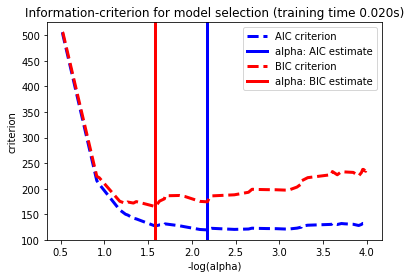

In [25]:
print(__doc__)

# Author: Olivier Grisel, Gael Varoquaux, Alexandre Gramfort
# License: BSD 3 clause

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4


# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)


## Analyze the final result

Finally, use the best value for regularization parameter according to AIC and BIC and compare the R squared parameters and MSE using train-test-split. Compare with the baseline model.

In [11]:
# Code for baseline model
from sklearn.metrics import 

In [12]:
# code for lasso with alpha from AIC

In [13]:
# code for lasso with alpha from BIC

## Level Up - Optional

### Create a Lasso Path

From this section, you know that when using lasso, more parameters shrink to zero as your regularization parameter goes up. In Scikit-Learn there is a function lasso_path which visualizes the shrinkage of the coefficients while alpha changes. Try this out yourself!

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py

### AIC and BIC for subset selection
This notebook shows how you can use AIC and BIC purely for feature selection. Try this code out on our Boston Housing data!

https://xavierbourretsicotte.github.io/subset_selection.html

## Summary

Congratulations! You now know how to create better linear models and how to use AIC and BIC for both feature selection and to optimize your regularization parameter when performing Ridge and Lasso. 